# Model Inference

In [4]:
import numpy as np
import pandas as pd

In [1]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 30.5 MB/s eta 0:00:00


/kaggle/input/yolo_v8_custom/pytorch/default/1/best.pt

## Getting trained model and testing it for an image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x576 2 JOYs, 489.9ms
Speed: 21.0ms preprocess, 489.9ms inference, 19.9ms postprocess per image at shape (1, 3, 640, 576)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'SAD', 1: 'NEUTRAL', 2: 'JOY', 3: 'FEAR', 4: 'ANGRY', 5: 'SURPRISE', 6: 'CONTEMPT', 7: 'DISGUST'}
obb: None
orig_img: array([[[194, 184, 174],
        [197, 187, 177],
        [199, 189, 179],
        ...,
        [ 91,  52,  68],
        [ 90,  49,  70],
        [ 80,  38,  61]],

       [[194, 184, 174],
        [197, 187, 177],
        [199, 189, 179],
        ...,
        [ 90,  51,  67],
        [ 98,  57,

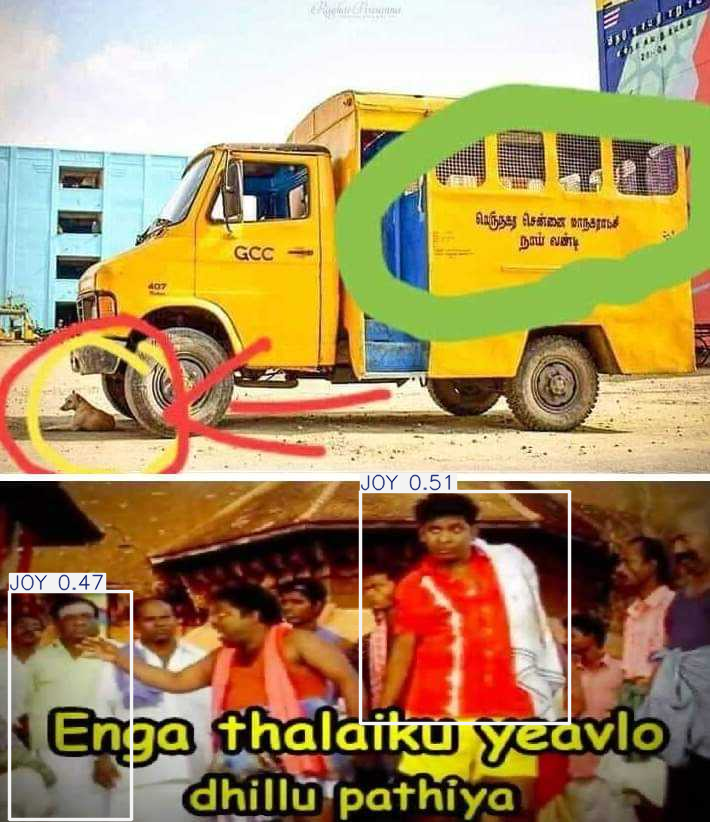

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("/kaggle/input/yolo_v8_custom/pytorch/default/1/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model(["/kaggle/input/your-task-is-to-find-the-face-from-the-given-image/archive/TestSet/TestSet/Memes_676.jpg"])  # return a list of Results objects
print(results)
# Process results list
for result in results:
   print(result.boxes)  # Boxes object for bounding box outputs
   print(result.masks)  # Masks object for segmentation masks outputs
   print(result.keypoints)  # Keypoints object for pose outputs
   print(result.probs)  # Probs object for classification outputs
   print(result.obb)  # Oriented boxes object for OBB outputs
   result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk

## modifying the to store the inference as a dataframe of confidence score, class, Bounding box coordinates.


0: 640x640 1 NEUTRAL, 401.6ms
Speed: 4.0ms preprocess, 401.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 boxes.
  Class_Name  Confidence  x   y    w    h
0    NEUTRAL    0.919907  0  14  224  168


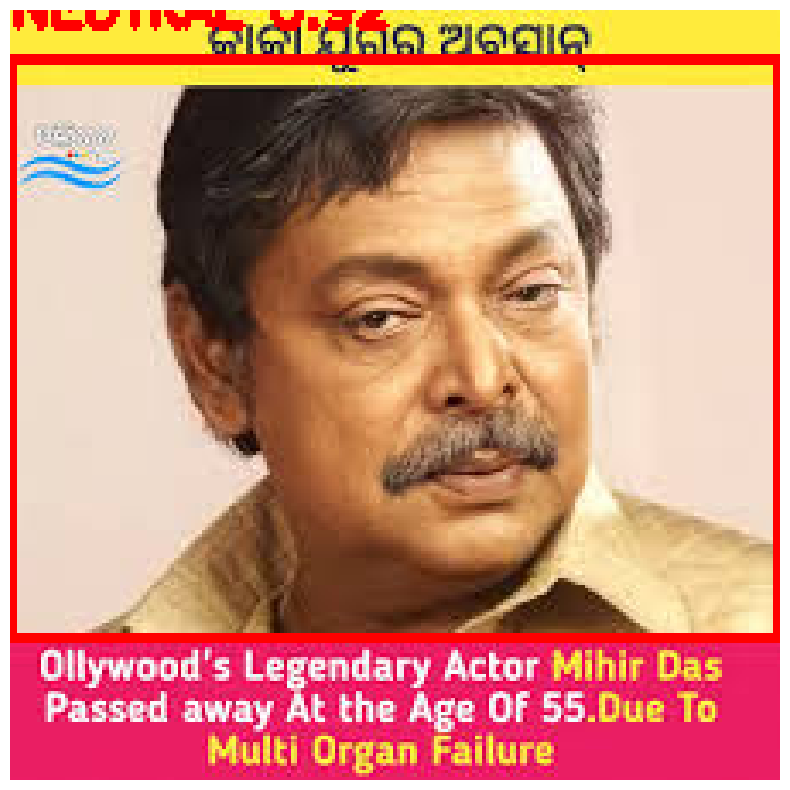

In [13]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Make sure to import your YOLO model

# Load a model
model = YOLO("/kaggle/input/yolo_v8_custom/pytorch/default/1/best.pt")  # Adjust the path as necessary

# Run batched inference on a list of images
image_path = "/kaggle/input/your-task-is-to-find-the-face-from-the-given-image/archive/TestSet/TestSet/JR_1_169.jpg"
results = model([image_path])  # return a list of Results objects

# Prepare a list to store results
results_list = []

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for displaying

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(f"Detected {len(boxes)} boxes.")

    for box in boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get the bounding box coordinates
        w = x2 - x1  # Width
        h = y2 - y1  # Height
        
        # Extract confidence score and class index
        conf = box.conf[0].item()  # Confidence score
        cls_index = int(box.cls[0].item())  # Class index
        class_name = result.names[cls_index]  # Get class name from the names dictionary

        # Append the extracted data to the results list
        results_list.append({
            "Class_Name": class_name,
            "Confidence": conf,
            "x": int(x1),
            "y": int(y1),
            "w": int(w),
            "h": int(h)
        })

        # Draw bounding box on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue color in BGR
        cv2.putText(image, f"{class_name} {conf:.2f}", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
# results_df.to_csv("emotion_predictions_v_final.csv", index=False)

# Print the DataFrame
print(results_df)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## doing inference for all test images

In [ ]:
import os
import pandas as pd
from ultralytics import YOLO

# Load a model
model = YOLO("/kaggle/input/yolo_v8_custom/pytorch/default/1/best.pt")  # Adjust the path as necessary

# Directory containing the images
image_dir = "/kaggle/input/your-task-is-to-find-the-face-from-the-given-image/archive/TestSet/TestSet"
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]  # List of image files
print(f"Found {len(image_files)} images in the directory.")

# Prepare a dictionary to store the best results for each image
best_results = {}

# Process each image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)  # Full path to the image
    print(f"Processing {image_file}...")

    # Run batched inference on the image
    results = model([image_path])  # return a list of Results objects

    # Process results list
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        print(f"Detected {len(boxes)} boxes.")

        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get the bounding box coordinates
            w = x2 - x1  # Width
            h = y2 - y1  # Height
            
            # Extract confidence score and class index
            conf = box.conf[0].item()  # Confidence score
            cls_index = int(box.cls[0].item())  # Class index
            class_name = result.names[cls_index]  # Get class name from the names dictionary

            # Check if this is the best result for the current image
            if image_file not in best_results or conf > best_results[image_file]["Confidence"]:
                best_results[image_file] = {
                    "Class_Name": class_name,
                    "Confidence": conf,
                    "x": int(x1),
                    "y": int(y1),
                    "w": int(w),
                    "h": int(h)
                }

# Convert the best results dictionary to a DataFrame
results_list = [{"Image_Name": image_file, **data} for image_file, data in best_results.items()]
results_df = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
# 

# Print the DataFrame
print(results_df)

Found 739 images in the directory.
Processing Memes_676.jpg...

0: 640x576 2 JOYs, 369.1ms
Speed: 3.9ms preprocess, 369.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)
Detected 2 boxes.
Processing Memes_1159.jpg...

0: 640x576 1 ANGRY, 377.8ms
Speed: 3.4ms preprocess, 377.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)
Detected 1 boxes.
Processing JR_1_402.jpg...

0: 352x640 1 ANGRY, 237.5ms
Speed: 1.8ms preprocess, 237.5ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Detected 1 boxes.
Processing Memes_83.jpg...

0: 640x576 1 SAD, 380.4ms
Speed: 3.4ms preprocess, 380.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)
Detected 1 boxes.
Processing Memes_1116.jpg...

0: 480x640 1 SAD, 1 ANGRY, 326.4ms
Speed: 2.8ms preprocess, 326.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Detected 2 boxes.
Processing Memes_1300.jpg...

0: 576x640 1 SAD, 1 NEUTRAL, 1 ANGRY, 388.8ms
Speed: 3.3ms preproc

In [4]:
results_df

""


## Saving it to a csv 

In [ ]:
results_df.to_csv("emotion_predictions_v1.csv", index=False)